### **PROJECT NAME:- CUSTOMER SEGMENTATION**
### **SUBMITTED TO:- TECH-A-INTERN**
### **SUBMITTED BY:- SHIVESH PANDEY**
### **LEVEL-1 TASK-2 DATA SCIENTIST**

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
! kaggle datasets download -d imakash3011/customer-personality-analysis

  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 66.7MB/s]


In [ ]:
! chmod 600 /content/kaggle.json

In [ ]:
!unzip \*.zip && rm *.zip

Archive:  customer-personality-analysis.zip
replace marketing_campaign.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
df=pd.read_csv('marketing_campaign.csv' ,sep="\t")

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(2216, 29)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(2216, 29)

In [ ]:
from datetime import date,datetime

now=datetime.now()
year=now.strftime("%Y")
year

'2024'

In [ ]:
df['age']=int(year)-df.Year_Birth

In [ ]:
df['spend']=df.MntFishProducts+df.MntFruits+df.MntGoldProds+df.MntMeatProducts+df.MntSweetProducts+df.MntWines

In [ ]:

today=date.today()
print(today)

2024-02-23


In [ ]:
df['seniority']=pd.to_datetime(df.Dt_Customer,dayfirst=True,format='%d-%m-%Y')
df.seniority

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: seniority, Length: 2216, dtype: datetime64[ns]

In [ ]:
df.seniority=pd.to_numeric(df.seniority.dt.date.apply(lambda x: (today-x)).dt.days, downcast='integer')/30
df.seniority

0       139.633333
1       121.300000
2       127.933333
3       122.166667
4       122.900000
           ...    
2235    130.233333
2236    118.166667
2237    122.700000
2238    122.733333
2239    138.266667
Name: seniority, Length: 2216, dtype: float64

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,spend,seniority
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,67,1617,139.633333
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,70,27,121.300000
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,59,776,127.933333
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,40,53,122.166667
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,43,422,122.900000


In [ ]:
import numpy as np

In [ ]:
df=df.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})
df['Marital_Status']=df.Marital_Status.replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})
df['Education']=df.Education.replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})

df['children']=df.Kidhome+df.Teenhome
df['has_child'] = np.where(df.children> 0, 'Has child', 'No child')
df['children'].replace({3: "3 children",2:'2 children',1:'1 child',0:"No child"},inplace=True)
df=df.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,spend,seniority,children,has_child
0,5524,1957,Postgraduate,Alone,58138.0,0,0,04-09-2012,58,635,...,0,0,3,11,1,67,1617,139.633333,No child,No child
1,2174,1954,Postgraduate,Alone,46344.0,1,1,08-03-2014,38,11,...,0,0,3,11,0,70,27,121.300000,2 children,Has child
2,4141,1965,Postgraduate,In couple,71613.0,0,0,21-08-2013,26,426,...,0,0,3,11,0,59,776,127.933333,No child,No child
3,6182,1984,Postgraduate,In couple,26646.0,1,0,10-02-2014,26,11,...,0,0,3,11,0,40,53,122.166667,1 child,Has child
4,5324,1981,Postgraduate,In couple,58293.0,1,0,19-01-2014,94,173,...,0,0,3,11,0,43,422,122.900000,1 child,Has child


In [ ]:

new_df=df[['age','Education','Marital_Status','Income','spend','seniority','has_child','children','Wines','Fruits','Meat','Fish','Sweets','Gold']]
new_df.head()

,age,Education,Marital_Status,Income,spend,seniority,has_child,children,Wines,Fruits,Meat,Fish,Sweets,Gold
0,67,Postgraduate,Alone,58138.0,1617,139.633333,No child,No child,635,88,546,172,88,88
1,70,Postgraduate,Alone,46344.0,27,121.300000,Has child,2 children,11,1,6,2,1,6
2,59,Postgraduate,In couple,71613.0,776,127.933333,No child,No child,426,49,127,111,21,42
3,40,Postgraduate,In couple,26646.0,53,122.166667,Has child,1 child,11,4,20,10,3,5
4,43,Postgraduate,In couple,58293.0,422,122.900000,Has child,1 child,173,43,118,46,27,15


In [ ]:
new_df.shape

(2216, 14)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

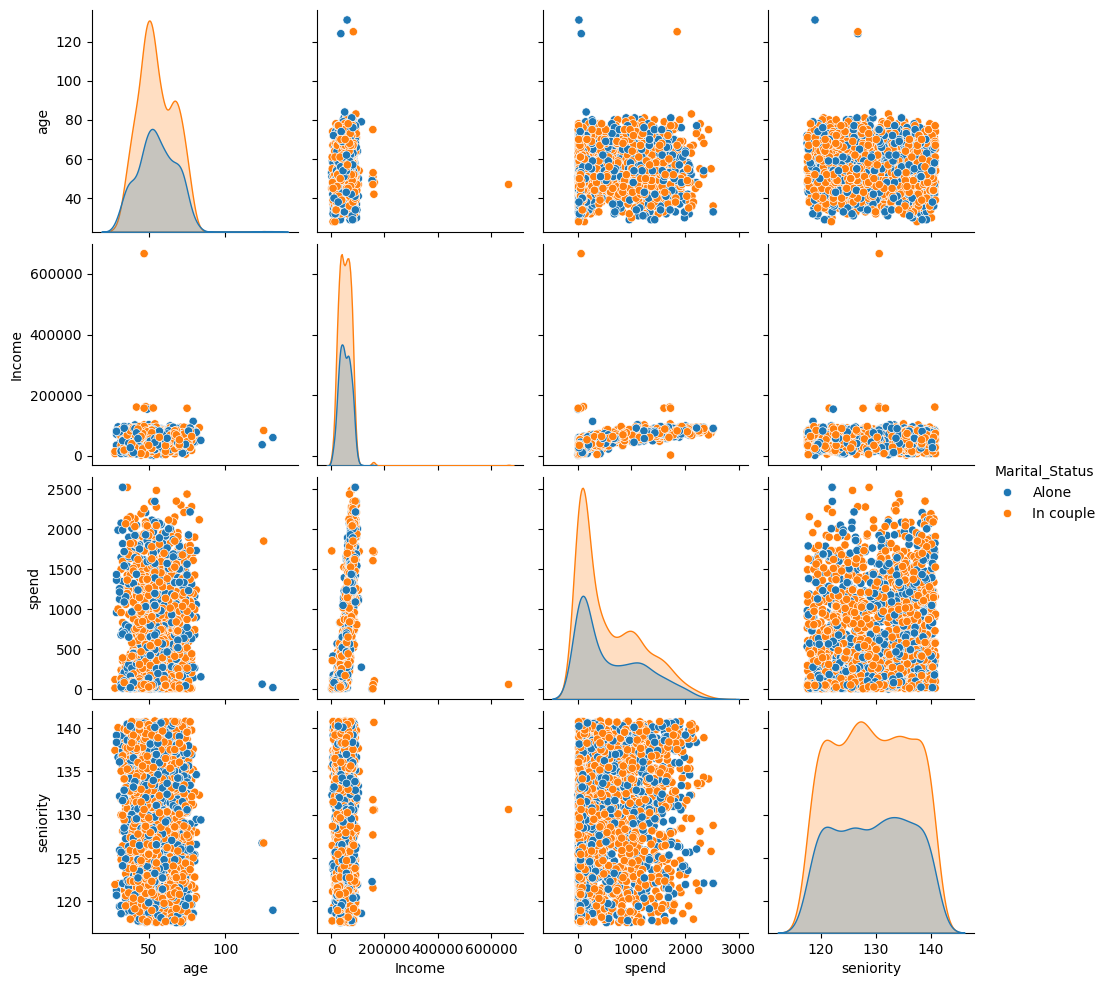

In [ ]:

sns.pairplot(new_df[['age','Income','spend','seniority','Marital_Status']], hue ='Marital_Status')
plt.show()

<Figure size 1500x500 with 0 Axes>

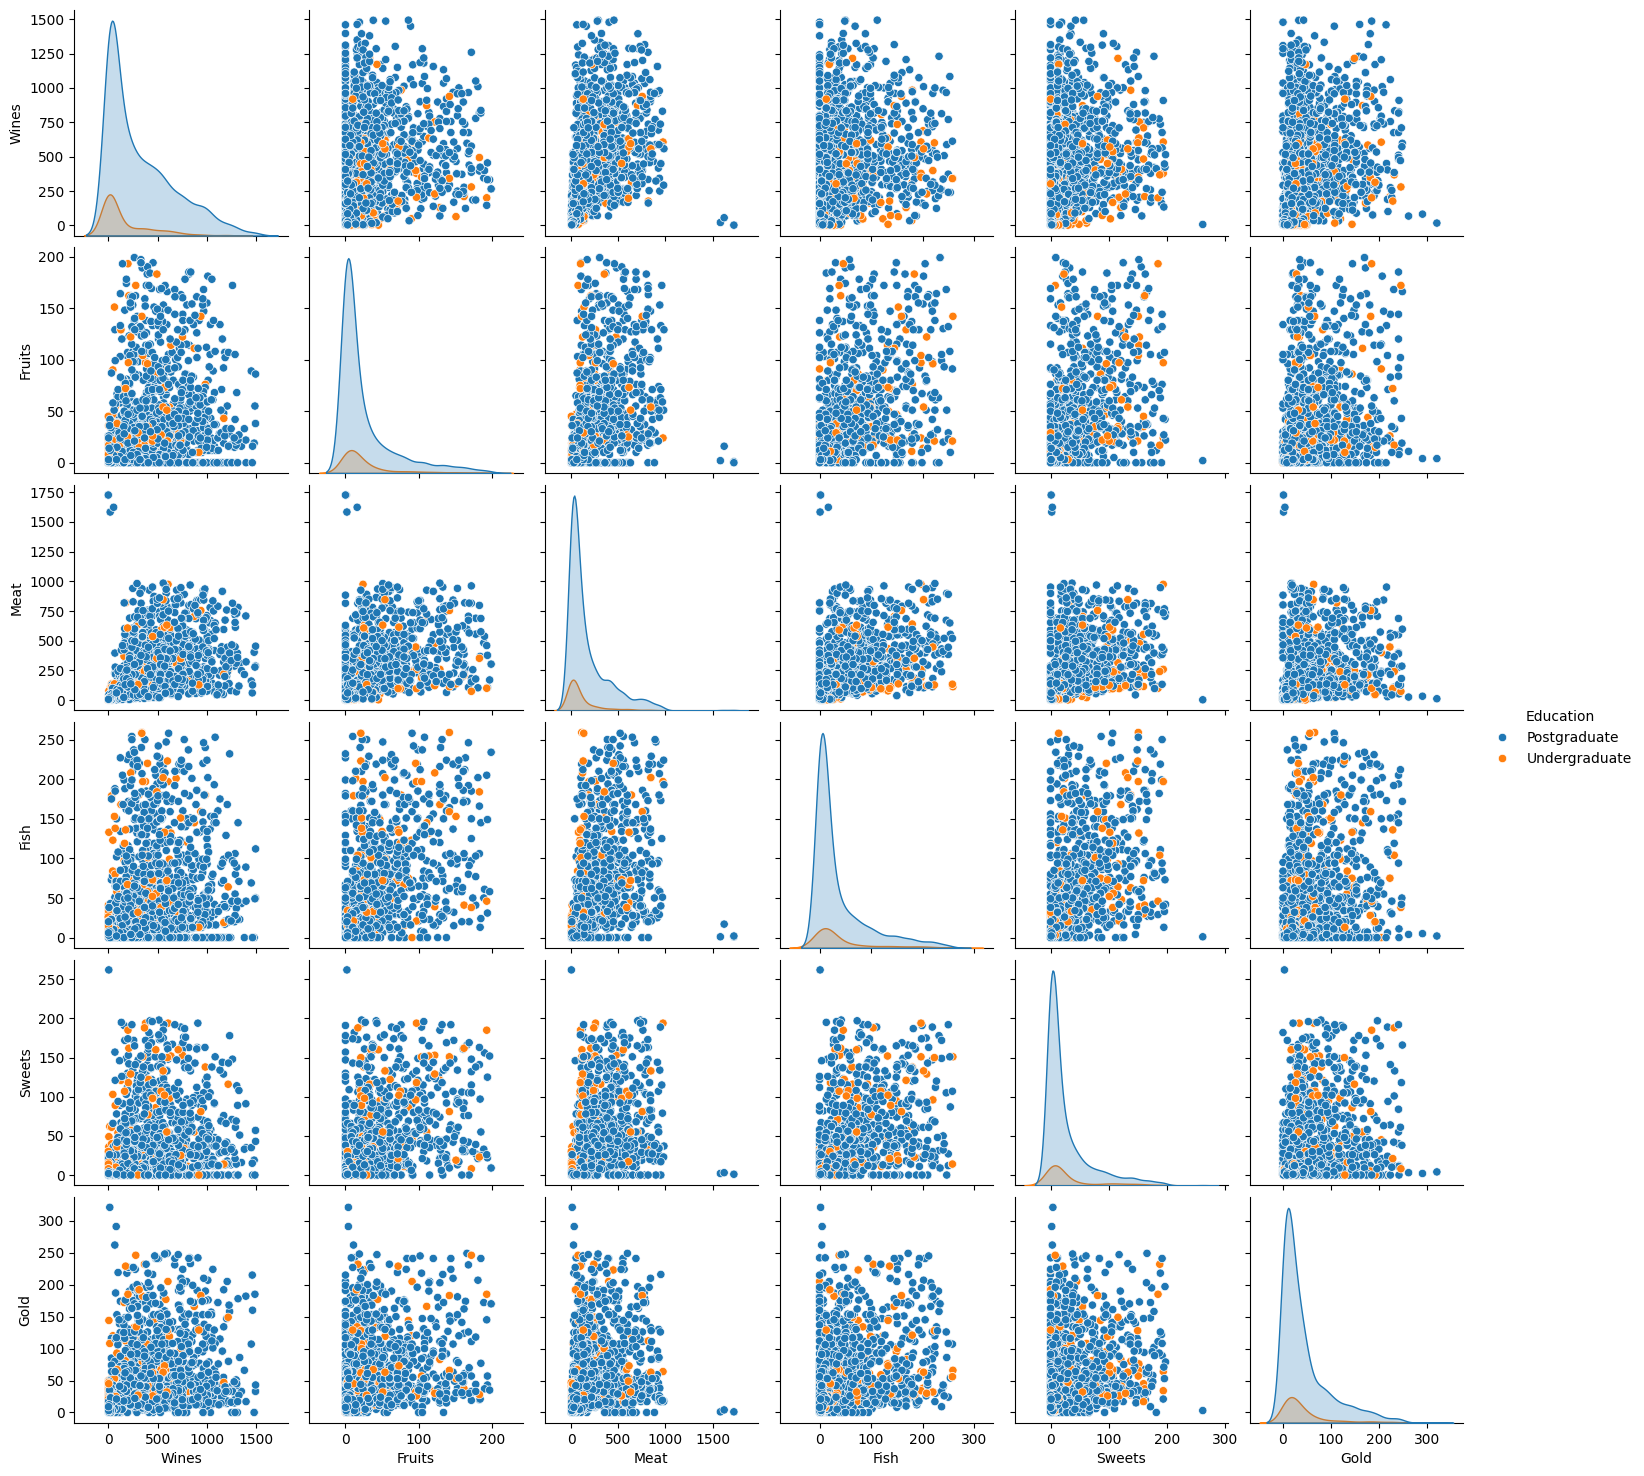

In [ ]:
plt.figure(figsize=(15,5))
sns.pairplot(new_df[['Wines','Fruits','Meat','Fish','Sweets','Gold','Education']], hue ='Education')
plt.show()

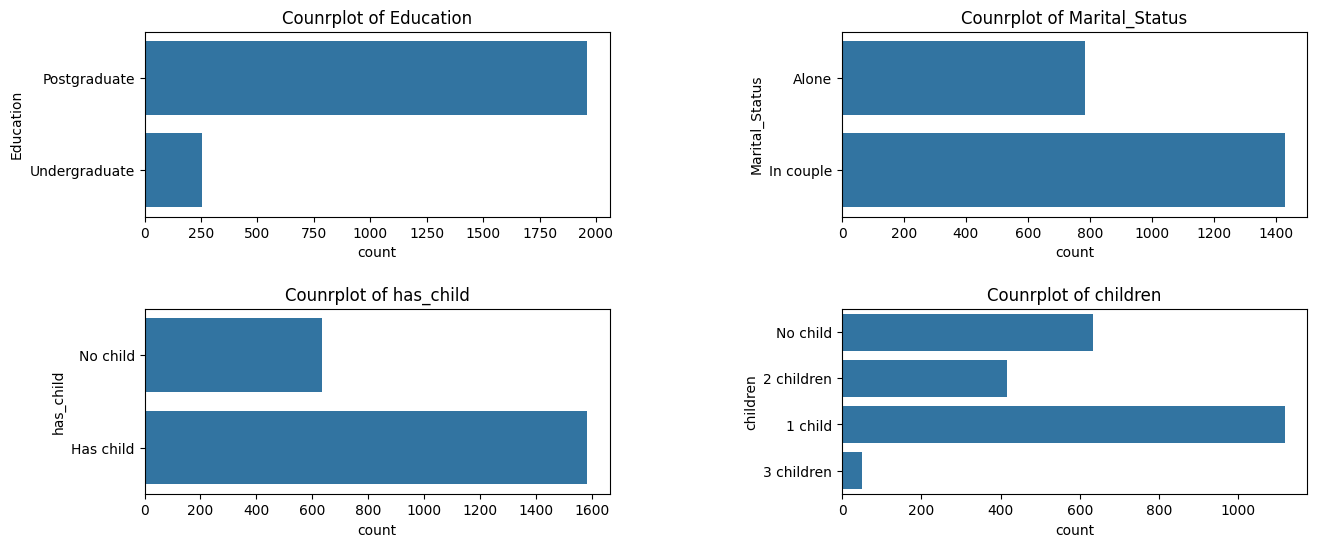

In [ ]:
plt.figure(figsize=(15,6))
n=0
for x in new_df[['Education','Marital_Status','has_child','children']]:
  n+=1
  plt.subplot(2,2,n)
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.countplot(y=x,data=new_df)
  plt.title('Counrplot of {}'.format(x))

plt.show()

<ipython-input-75-ec67a493fb79>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat= new_df.corr()


<Axes: >

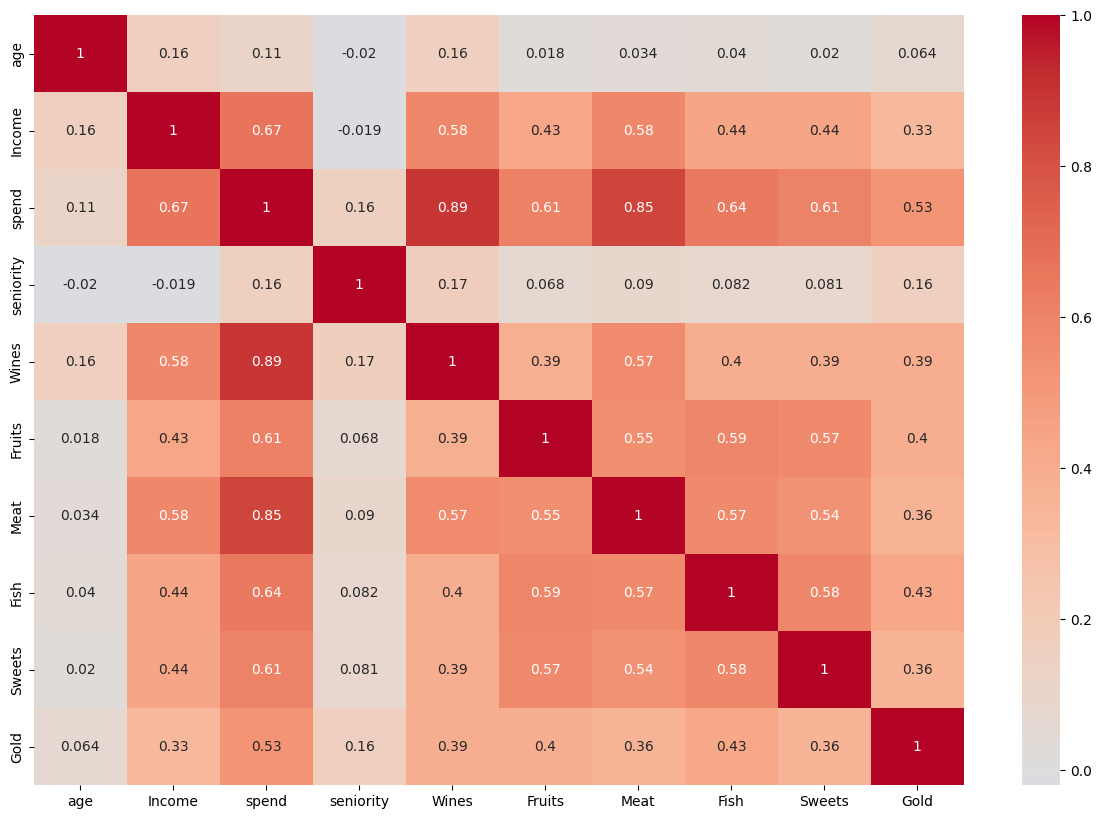

In [ ]:
corrmat= new_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corrmat,annot=True, cmap="coolwarm", center=0)

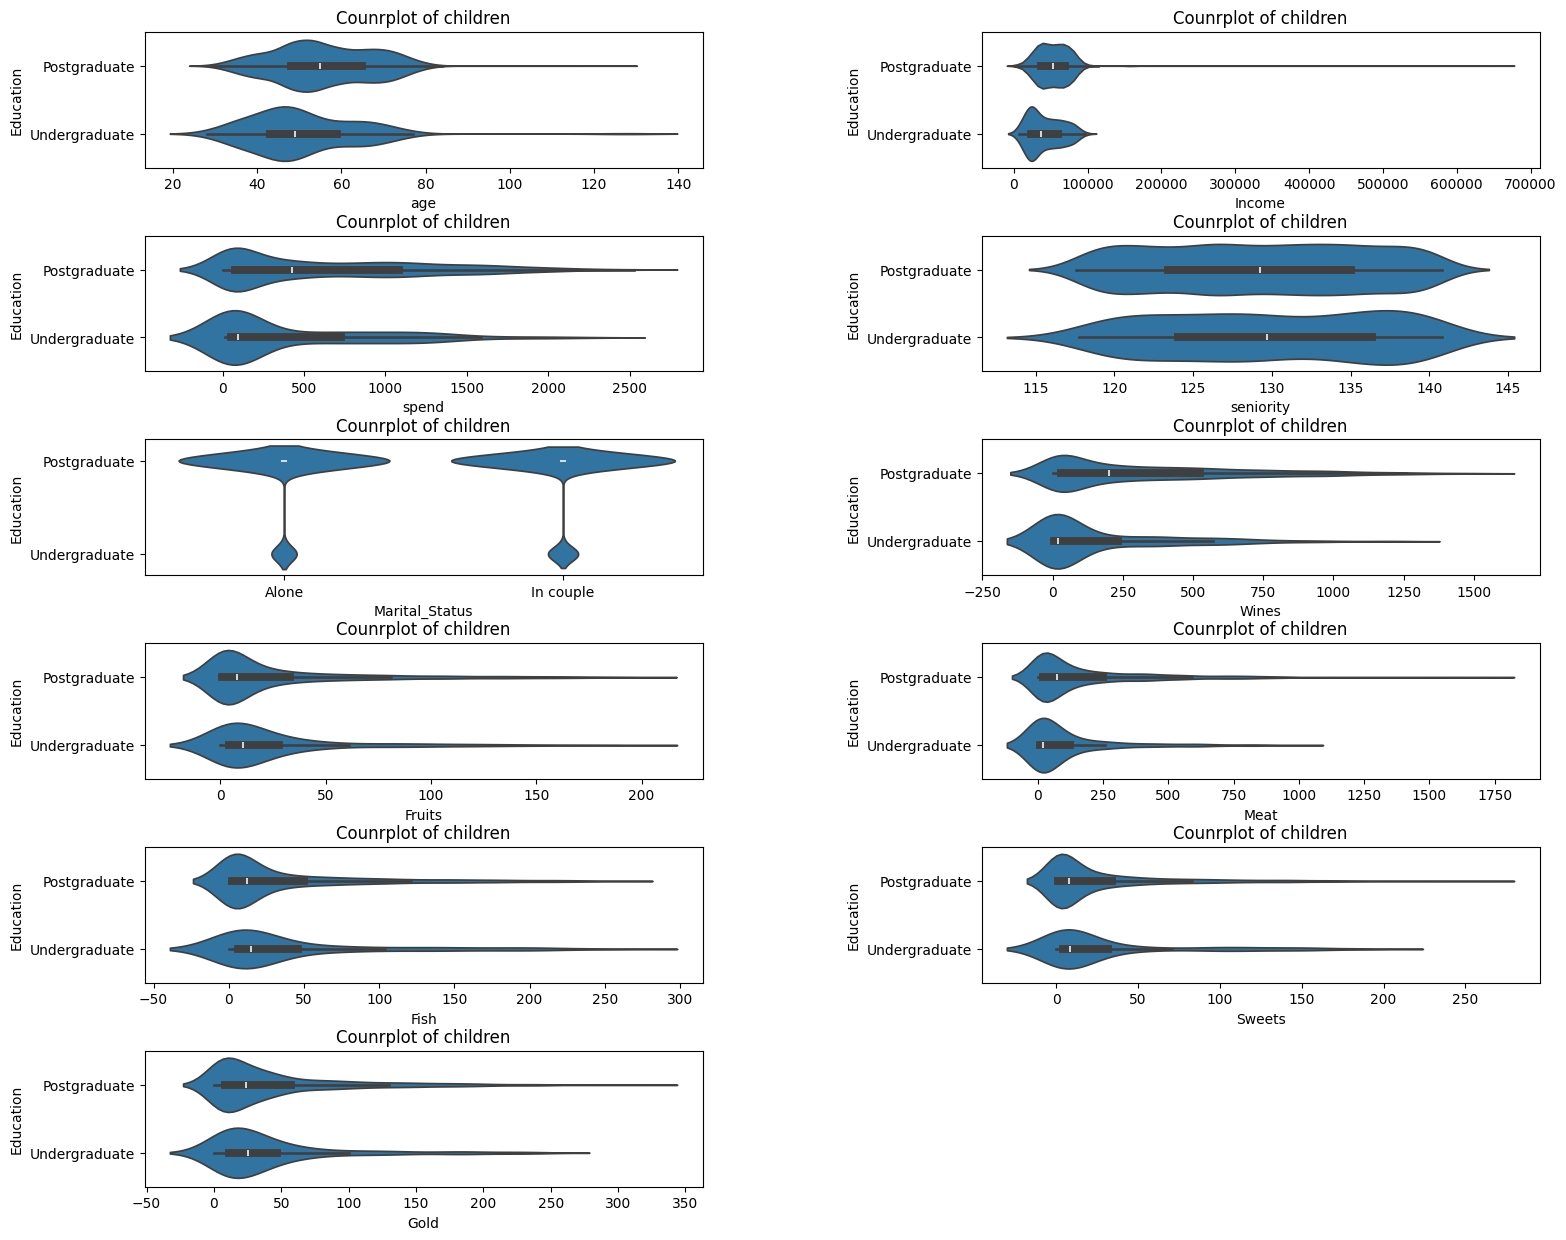

In [ ]:
plt.figure(figsize=(18,15))
n=0
for i in new_df[['age','Income','spend','seniority','Marital_Status','Wines','Fruits','Meat','Fish','Sweets','Gold']]:
  n+=1
  plt.subplot(6,2,n)
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.violinplot(x=i,y='Education',data=new_df)
  plt.title('Counrplot of {}'.format(x))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

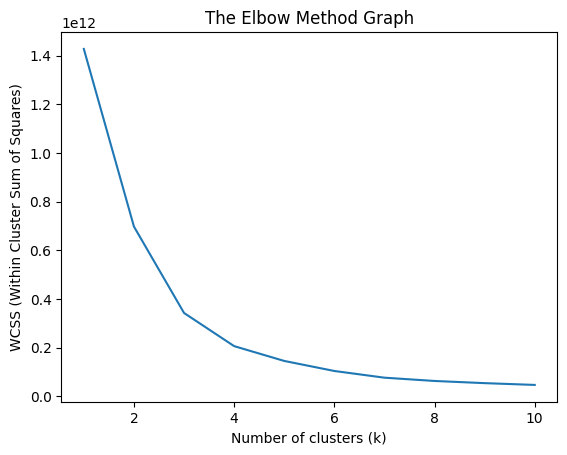

In [ ]:
from sklearn.cluster import KMeans
wcss_list= []

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
x = df[numeric_columns].values
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)

    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-80-8db975bd60f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cluster'] = kmeans.labels_


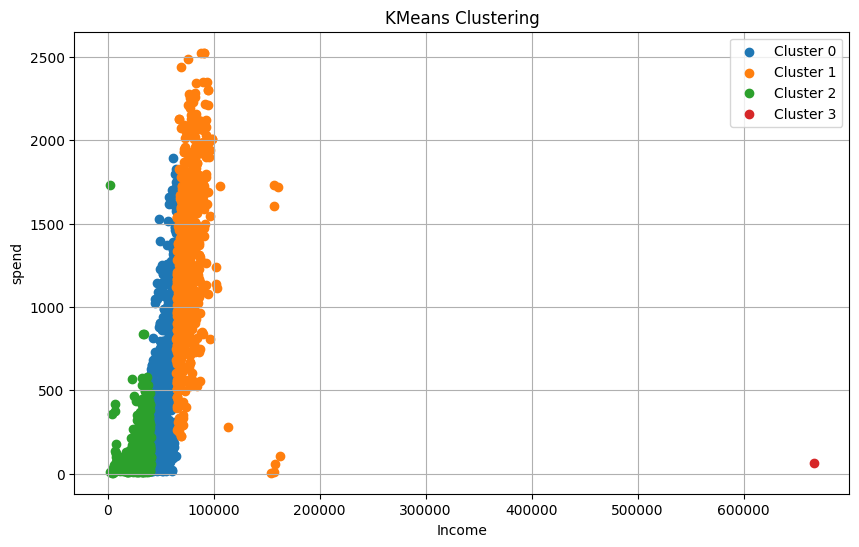

In [ ]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
kmeans.fit(X)
new_df['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))

x_axis = 'Income'
y_axis = 'spend'

for cluster_label in range(num_clusters):
  cluster_data = new_df[new_df['Cluster'] == cluster_label]
  plt.scatter(cluster_data[x_axis], cluster_data[y_axis], label=f'Cluster {cluster_label}')

plt.title('KMeans Clustering')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.legend()
plt.grid(True)
plt.show()
